<a href="https://colab.research.google.com/github/nidhi-158/second-project/blob/main/MNIST_(Digit_Recog_(Multi_class))_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this we have 10 ouput nodes for each digit from 0,1,2,...,9.
So the model gives the probability for every output node and whichever prob. is high is the resultant digit.

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [32]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [33]:
x_train.shape   #60k images and each having size of 28X28

(60000, 28, 28)

In [34]:
x_test.shape

(10000, 28, 28)

In [35]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

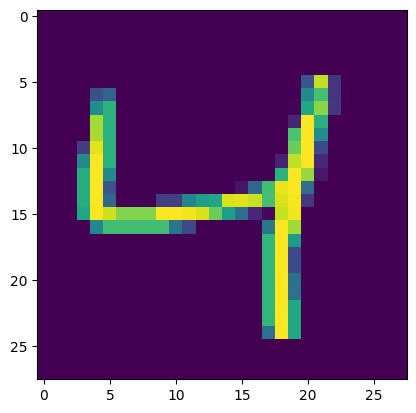

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])          #to show an image

All the pixel values are in range of [0,255]
Now convert all the pixel values in the range of 0 to 1.
By dividing each pixel by 255.

In [37]:
x_train=x_train/255
x_test=x_test/255

In [38]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now we have image of size 28X28 px which is 784 .
Now to get the 784 value we need to flatten the image pixels.

In [39]:
model= Sequential()

model.add(Flatten(input_shape=(28,28)))                  # Coverts an image of 2d (28,28) into 1D (784)
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))                 # softmax use for multiclass classification

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])               # Sparse categorical crossentropy doesn't need onehot encoding where as cross entropy needs one hot encoding


Train the model

In [42]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2822 - accuracy: 0.9175 - val_loss: 0.1484 - val_accuracy: 0.9574
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.1165 - val_accuracy: 0.9651
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0805 - accuracy: 0.9757 - val_loss: 0.1135 - val_accuracy: 0.9672
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0616 - accuracy: 0.9810 - val_loss: 0.1046 - val_accuracy: 0.9687
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0897 - val_accuracy: 0.9741
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.1015 - val_accuracy: 0.9723
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0305 - accuracy: 0.9897 - val_loss: 0.1003 - val_accurac

Test the model

In [43]:
y_prob= model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [44]:
y_pred=y_prob.argmax(axis=1)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

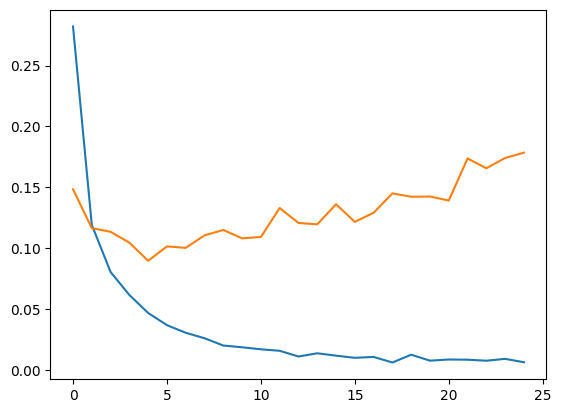

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

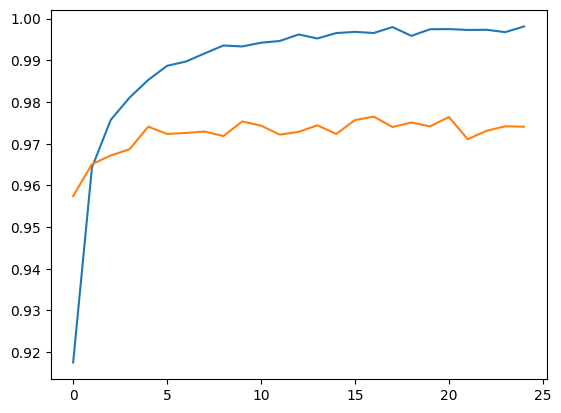

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Test(Predict) the model

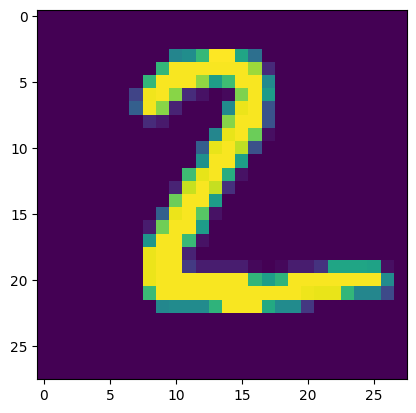

In [51]:
x_test[1]
plt.imshow(x_test[1])

In [52]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([2])